# Correlation matrix and PCA

Test to perform the correlation matrix and the associated plots
Likewise do the PCA analysis.
Other statistical tools are tested.

In [81]:
using PyCall
using Distributions, Statistics, Distances
using DataFrames
using Random , Printf, Glob

import PyPlot , CSV
import Distances, StatsBase
sns= pyimport("seaborn")

rootdir = ENV["GAIA_ROOT"]

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plots"
ocdir= "$wdir/oc2"

cd(wdir)

## Pearson's correlation

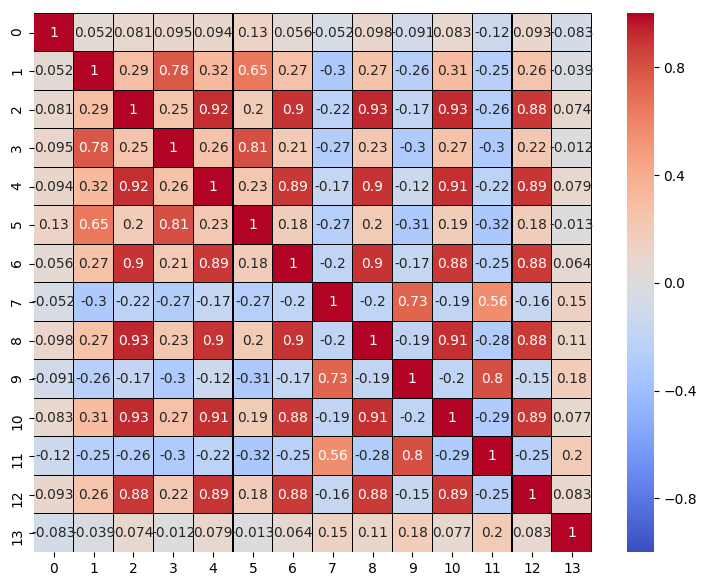

In [82]:
## reading the test file
df= CSV.read("votlist.finalSample_metric0.01-age.MS.csv", delim=";")

#data= rand(20,10)

## Pearson cor
data= convert(Matrix, df[:,3:end])     ## only relevant columns
data1= copy(data)
p= Statistics.cor(data,dims=1)

## heatmap
fig= PyPlot.figure(figsize=(9,7))
heat_map = sns.heatmap(p, vmin=-1, vmax=1, annot=true,cmap= "coolwarm",linewidths=0.1, linecolor="black")
PyPlot.show()


